<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:black dashed 2px; 
            border-radius:5px;
            margin: 20px 0;">
            
            
# Pandas Data Analysis



**Staff:** Loren Verreyen <br/>
**Support Material:** [exercises](../exercises/Questions_2023/12_EX_Pandas.ipynb) <br/>
**Support Sessions:**  Thursday, October 12, 10:30AM

<h2 style="color:purple">Datasets</h2>

- <a style="font-size:120%;color:blue" href="https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master--/data/titanic.csv">titanic.csv</a>
- <a style="font-size:120%;color:blue" href="https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master/data/311-service-requests.csv">311-service-requests.csv</a>
- <a style="font-size:120%;color:blue" href="https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master/data/bikes.csv">bikes.csv</a>
</div>

<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:lightgrey solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 1 : Introduction to Pandas 

</div>

## An introduction to Pandas


#### Learning Objectives
- Understand what Pandas is used for
- Be able to implement the fundamental components of Pandas
- Be familiar with the Pandas approach


#### Programme
- What is Pandas?
- Why would I use it?
- How do I use Pandas?


In [1]:
%matplotlib inline 
# this is magic (a "magic expression" that makes plots appear in the notebook)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV Files (Comma-Separated Values)

CSV's are a file type for storing tabular data. You may know them from Microsoft Excel. They store data like this:

```
column1,column2,column3
index1,0,1
index2,3,2
index3,6,3
```

The commas separate the values in the table (hence the name), and the returns separate the lines.

In the above example, the first row and first column are used as a **header** to specify column names and the index. This is a best practice but not a necessity. 

## Opening CSVs in Pandas

Pandas works with all major forms of tabular data. It can even import Excel spreadsheets. However, most of the time we work with CSV's and Jsons

In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
#check present working directory
pwd #present working directory

NameError: name 'pwd' is not defined

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Some random examples:

In [5]:
df['Survived'].mean()

0.3838383838383838

Example: mean survival rate per sex?

In [11]:
test = df.groupby('Sex')['Survived'].mean()

print(type(test))

<class 'pandas.core.series.Series'>


Plot that:

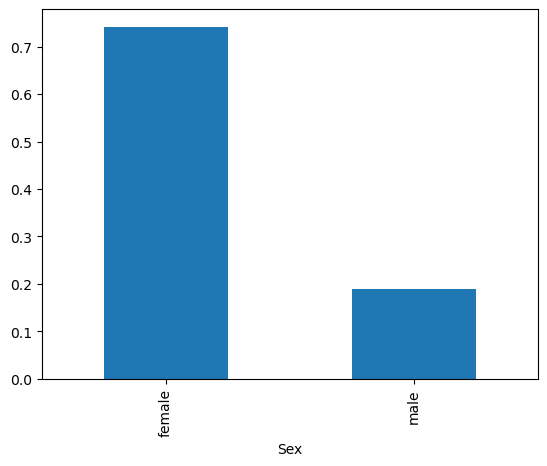

In [7]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar');

Fare per class?

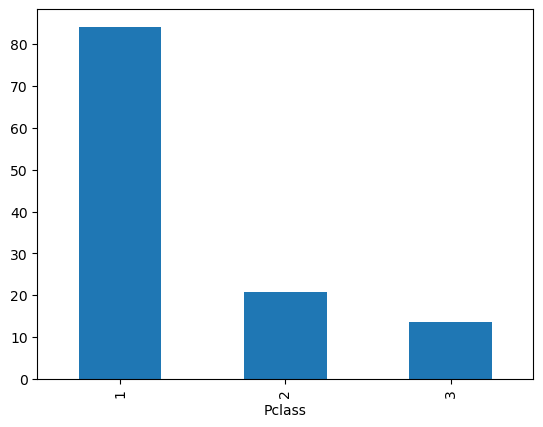

In [12]:
df.groupby('Pclass')['Fare'].mean().plot(kind='bar');

Survival rate per class?

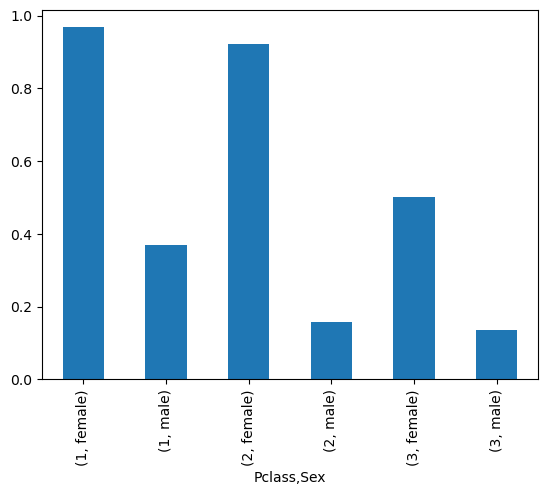

In [18]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().plot(kind='bar');

Survival vs fare?

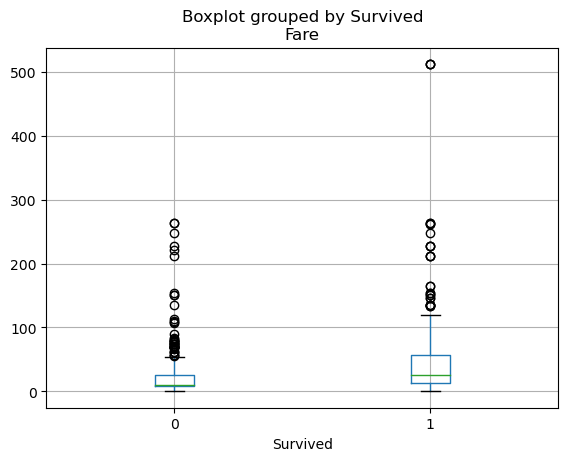

In [22]:
df.boxplot('Fare','Survived');

# The pandas data structures: `DataFrame` and `Series`

Pandas uses two main structures, a DataFrame and a Series. Understanding them will help you to use Pandas for data analysis.

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## DataFrame

A `DataFrame` is a tabular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns, like a spreadsheet.

The `DataFrame` is a kind of container object in a similar way as a `dictionary`, but which can be acessed along two axes. 

#### Characteristics  
- 2-dimensional data structure
- A table
- Similar to a spreadsheet
- An object type within Python

### Attributes of the DataFrame

Like dictionaries have `keys` and `values`, the contents of a DataFrame can be accessed using a set of attributes. The primary attributes for `DataFrames` are as follows:

In [24]:
df.index # row labels

RangeIndex(start=0, stop=891, step=1)

Note that `index` in Pandas DataFrames refers to **rows**. The row labels above are continuous, 0-891, and thus summarized. That is different from the column labels as you'll see below.

In [25]:
df.columns # column labels

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The `values` attribute returns an array (a `numpy` version of lists) or arrays that contains the whole dataset.

In [26]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

The `shape` attribute is very useful for getting a sense of the size of the dataset. The format is `(n_rows, n_columns)`.

In [27]:
df.shape

(891, 12)

DataFrames can contain all kinds of different object types. Standard Python objects like `int` or `str` are put into object types specific to DataFrames. To check the data types of the different columns:

In [28]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

An overview of that information can be given with the `info()` method:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is also the `describe()` method:

In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Building DataFrames from Scratch.

#### With a list

Apart from importing your data from an external source (text files, Excel spreadsheets, databases, ..), it is also common to build dataframes from Python data structures like lists and dictionaries.

Note that with this method, each list represents a single observation or, in this case, a country. You could use other ordered objects as well, such as `tuples`: i.e. tuple of lists, list of tuples, tuple of tuples, list of lists.

In [32]:
data = [
    ['Belgium', 11.3, 30510, 'Brussels'],
    ['France', 64.3, 671308, 'Paris'],
    ['Germany', 81.3, 357050, 'Berlin'],
    ['Netherlands', 16.9, 41526, 'Amsterdam'],
    ['United Kingdom', 64.9, 244820, 'London']
]

headers = ['country', 'population', 'area', 'capital'] # column headers

df_countries = pd.DataFrame(data, columns=headers) # what happens if we don't say `columns=headers`?
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


#### With a dictionary

Rather than feeding a list of lists as rows, we can provide a dictionary of columns. In this case, the keys of the dictionary are the column labels and the values are some kind of ordered iterable (e.g. `list`, `tuple`, `pandas.Series`). 

Note that the items for each iterable should be in the order of the other iterables. For example, $64.3$ in 'population' should correspond with 'France' in 'country'.

In [33]:
data = {
    'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
    'population': [11.3, 64.3, 81.3, 16.9, 64.9],
    'area': [30510, 671308, 357050, 41526, 244820],
    'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']
}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**, similar to a `list`, but possessing special methods and attributes for data analysis. A `DataFrame` consists of `Series` objects "glued" together. For instance, if we select the "Age" column below we'll see that the column *is* a `Series`.

#### Characteristics  
- 1 dimensional data structure
- Each **column** in a `DataFrame` is a `Series`
- Each **row** in a `DataFrame` is a `Series`

![series](https://pandas.pydata.org/docs/_images/01_table_series.svg)

In [35]:
age = df['Age']
print(type(df['Age']))

<class 'pandas.core.series.Series'>


In [ ]:
age

The `Series` has a lot of useful methods. Here are some examples:

In [36]:
print('mean', age.mean())
print('max', age.max())
print('min', age.min())
print('mean', age.mean())
print('sum', age.sum())

mean 29.69911764705882
max 80.0
min 0.42
mean 29.69911764705882
sum 21205.17


### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [37]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [39]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [38]:
age[0]

22.0

Unlike the NumPy array, though, this index can be something other than integers:

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df = df.set_index('Name')
df

KeyError: "None of ['Name'] are in the columns"

In [44]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

How is a `Series` different from a plain `numpy` array? `Series` can have a non-numeric index:

In [45]:
age['Dooley, Mr. Patrick']

32.0

Many things you can do with numpy arrays, can also be applied on DataFrames / Series; e.g. element-wise operations:

In [46]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
Allen, Mr. William Henry                               35000.0
                                                        ...   
Montvila, Rev. Juozas                                  27000.0
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

A range of methods exists:

In [47]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [49]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [50]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# *Class Exercise*
- How many women were on board? How many men?
- What were the names of the oldest and youngest passenger?
- What was the age distribution of the Titanic passengers?
- What was the maximum Fare that was paid? And the median?
- Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).
- **Can you think yourself of a question that we could answer on the basis of the dataset?**

In [58]:
#how many women and men?

df['Sex'].value_counts()

df.groupby('Sex')['Age'].count()

Sex
female    261
male      453
Name: Age, dtype: int64

In [ ]:
#Names of oldest and youngest passengers

In [65]:
print(df['Age'].idxmin())
print(df['Age'].idxmax())

Thomas, Master. Assad Alexander
Barkworth, Mr. Algernon Henry Wilson


In [69]:
#reset the index
df_1 = df.reset_index()
df_1['Age'].max()

80.0

In [74]:
df_1[df_1["Age"] == 80]

#or in one
df_1[df_1['Age'] == df_1["Age"].max()]

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,"Barkworth, Mr. Algernon Henry Wilson",631,1,1,male,80.0,0,0,27042,30.0,A23,S


<Axes: ylabel='Frequency'>

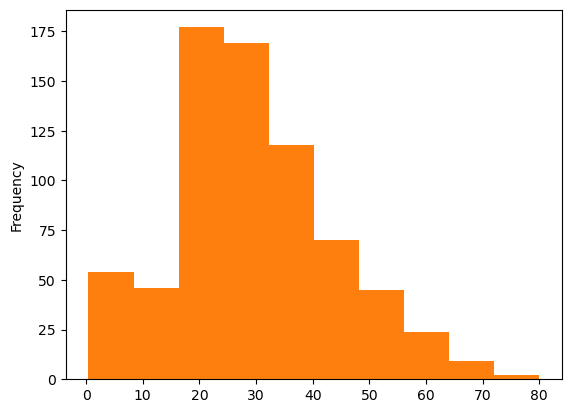

In [168]:
#What was the age distribution of the Titanic passengers?
hist = df['Age'].hist(bins=20)

# or
df["Age"].plot(kind = "hist")

In [75]:
#What was the maximum Fare that was paid? And the median?
df["Fare"].max()

512.3292

In [81]:
#Calculate the average survival ratio for all passengers 
#(note: the 'Survived' column indicates whether someone survived (1) or not (0)).

total_passenger = len(df)
survivors = df['Survived'].sum()

survival_ratio  = survivors/total_passenger
print(survival_ratio)


0.3838383838383838


# Selecting and filtering data

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [82]:
df['Age']

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [83]:
df[['Age', 'Fare']]

,Age,Fare
Name,,
"Braund, Mr. Owen Harris",22.0,7.2500
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,71.2833
"Heikkinen, Miss. Laina",26.0,7.9250
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
"Allen, Mr. William Henry",35.0,8.0500
...,...,...
"Montvila, Rev. Juozas",27.0,13.0000
"Graham, Miss. Margaret Edith",19.0,30.0000
"Johnston, Miss. Catherine Helen ""Carrie""",NaN,23.4500


But, slicing accesses the rows:

In [84]:
df[10:15]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Sandstrom, Miss. Marguerite Rut",11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.5500,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.0500,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.2750,NaN,S
"Vestrom, Miss. Hulda Amanda Adolfina",15,0,3,female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by "label"; or rather: the index
* `iloc`: selection by position

Note that we have changed the index to the `Name` column:

In [85]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [89]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [94]:
df.iloc[0:2,1:12]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


The different indexing methods can also be used to assign data:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [ ]:
df

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [95]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [101]:
df[df['Pclass'] == 3]



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...
"Wick, Mrs. George Dennick (Mary Hitchcock)",857,1,1,female,45.0,1,1,36928,164.8667,NaN,S
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


In [102]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...
"Wick, Mrs. George Dennick (Mary Hitchcock)",857,1,1,female,45.0,1,1,36928,164.8667,NaN,S
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:lightgrey solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 2 : Solving Real Problems with Pandas 

</div>

In this part of the class we will work on group problems using a series of datasets.

In [113]:
# we will import on a table on complaint call data from New York

complaints = pd.read_csv('../data/311-service-requests.csv', dtype='unicode')
print(complaints.index)
complaints.head(n = 10)

RangeIndex(start=0, stop=111069, step=1)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7499893014072,-73.88198770727831,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.68153278675525,-73.83173699701601,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.67181584567338,-73.84309181950769,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73991339303542,-74.00079028612932,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.66820406598287,-73.95064760056546,"(40.66820406598287, -73.95064760056546)"


# *Class Exercise: What's the most common complaint type?*

There's a `.value_counts()` method that we can use:

If we just wanted the top 10 most common complaints, we can do this:

In [110]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: count, dtype: int64

But it gets better! We can plot them!

<Axes: xlabel='Complaint Type'>

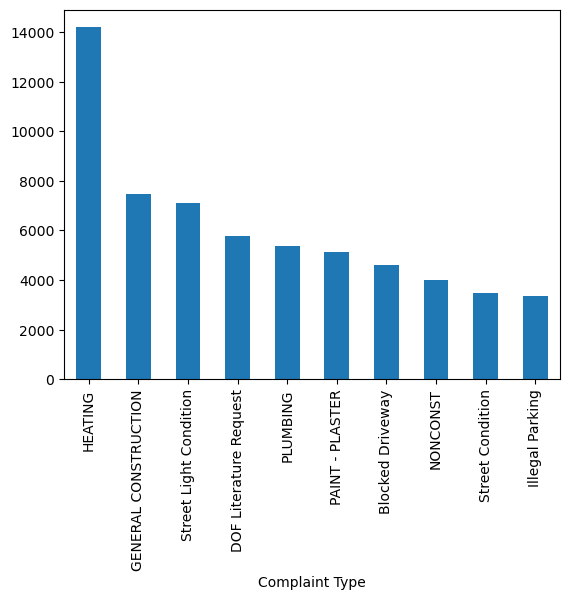

In [106]:
complaint_counts[:10].plot(kind='bar')

This quick set of methods unwraps a large table and communicates it clearly based on a query.

## Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [ ]:
complaints.head()

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [116]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63618202176914,-74.1161500428337,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.55342078716953,-74.19674315017886,"(40.55342078716953, -74.19674315017886)"
28,26594085,10/31/2013 12:32:08 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026,121 WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80238950799943,-73.95052644123253,"(40.80238950799943, -73.95052644123253)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [117]:
# we can use boolean indexing
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [120]:
# these are our boolean indices
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk" 
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

#Equal to 
complaints[(complaints['Complaint Type'] == "Noise - Street/Sidewalk" ) & (complaints['Borough'] == "BROOKLYN")][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6617931276793,-73.95993363978067,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724599563793525,-73.95427134534344,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63616876563881,-73.97245504682485,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6429222774404,-73.97876175474585,"(40.6429222774404, -73.97876175474585)"


Or if we just wanted a few columns:

In [121]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


# *Class Exercise: So, which borough has the most noise complaints?* 


In [136]:
# answer here
print(noise_complaints.groupby('Borough')['Unique Key'].count().idxmax())

#or
noise_complaints["Borough"].value_counts()

MANHATTAN


Borough
MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: count, dtype: int64

(Hint: It's Manhattan!)

But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [137]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [144]:
noise_rel = (noise_complaint_counts / complaint_counts)
noise_rel2 = noise_rel.sort_values(ascending = False)

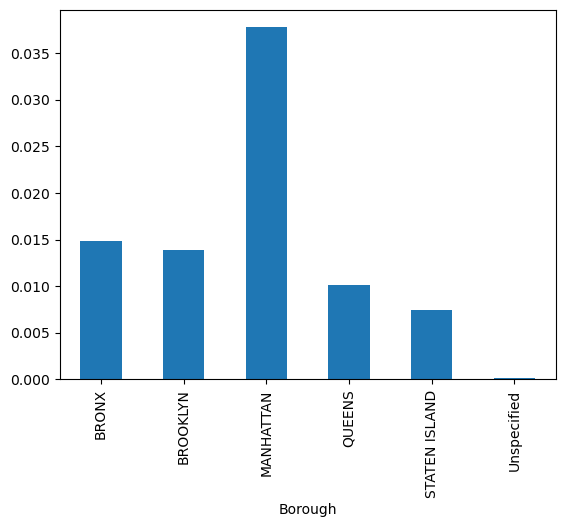

In [139]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar');

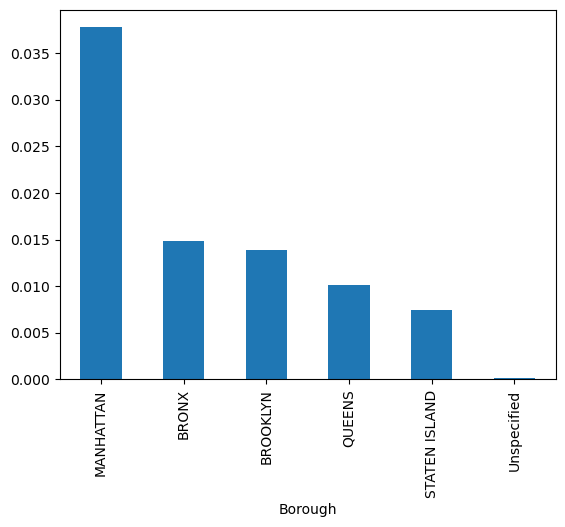

In [145]:
noise_rel2.plot(kind='bar');

# *Class Exercise: How many ride their bike per day?*
</div>



For this problem we'll need to group out dataframe into subsets. We will learn the `groupby` method.

First, we need to load up the data; in this case usage data about bike lanes in Montreal. We've done this before.

In [157]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes.head()


,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


Next up, we're just going to look at the Berri bike path.

<Axes: xlabel='Date'>

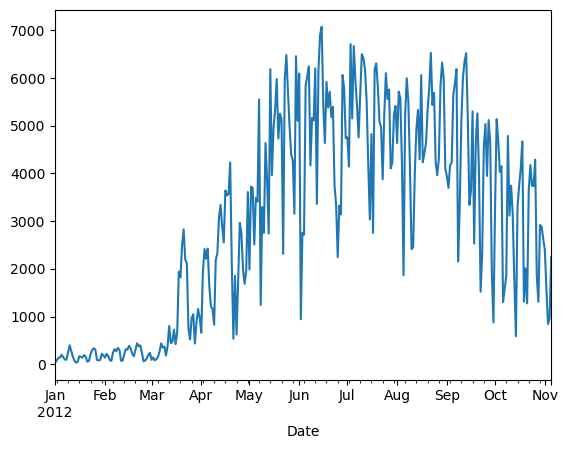

In [151]:
bikes['Berri 1'].plot()

We can also isolate this column:

In [149]:
berri_bikes = bikes[['Berri 1']].copy()

In [150]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [152]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [158]:
berri_bikes.index.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
      dtype='int32', name='Date', length=310)

We actually want the weekday, though:

In [159]:
berri_bikes.index.weekday

Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       ...
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
      dtype='int32', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [160]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby or Excel groupby, if you're familiar with those. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [166]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(["sum", "mean"])
weekday_counts

Berri 1             
            sum         mean
weekday                     
0        134298  2984.400000
1        135305  3075.113636
2        152972  3476.636364
3        160131  3639.340909
4        141771  3222.068182
5        101578  2308.590909
6         99310  2206.888889

It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [162]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


<Axes: >

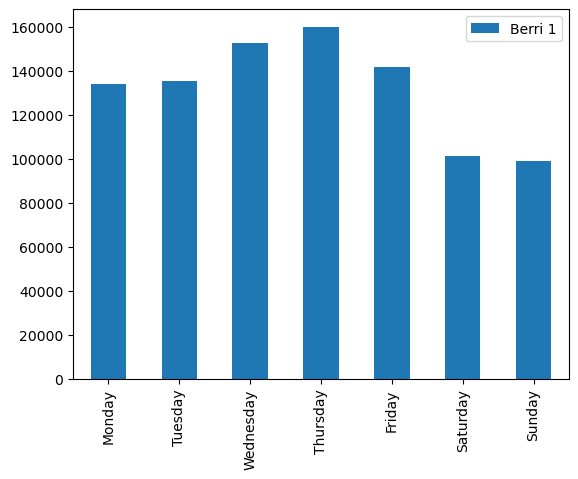

In [163]:
weekday_counts.plot(kind='bar')